#K vecinos más cercanos (KNN)
El modelo K vecinos más cercanos (K-nearest neighbors), más conocido por sus siglas KNN es un algoritmo utilizado para tareas de clasificación y regresión. En KNN, un punto de datos se clasifica o se predice en función de la mayoría de las clases o valores de los K puntos de datos más cercanos en el espacio de características.

Por ejemplo, si quisiéramos predecir cuánto dinero gasta un cliente potencial en nuestro negocio, podríamos hacerlo en base a los 5 clientes más similares a él y promediar sus gratos para hacer la predicción.

##Estructura
El modelo se construye en función de unos pasos bien delimitados y definidos, que son los siguientes:

1. **Selección del valor de K**: Se elige un valor para K, que representa el número de puntos de datos más cercanos que se considerarán para clasificar o predecir el nuevo punto de datos. Un valor pequeño puede llevar a un modelo más ruidoso y sensible a outliers, mientras que un valor grande puede suavizar las fronteras de decisión.

2. **Medición de distancia**: Se utiliza una métrica para calcular la distancia entre el punto de datos a clasificar o predecir y los demás puntos de datos en el conjunto de entrenamiento.

3. **Identificación de los K vecinos más cercanos**: Se seleccionan los K puntos de datos más cercanos (en función de la medición seleccionada).

4. **Predicción**: Si se trata de un problema de clasificación, el nuevo punto se clasifica en la clase más frecuente entre los ``Kvecinos más cercanos. Si se trata de un problema de regresión, el valor objetivo para el nuevo punto se calcula como la media o la mediana de los valores de losK` vecinos más próximos.

Además, el modelo no implica una fase de entrenamiento propiamente dicha, ya que todo el conjunto de entrenamiento se almacena en memoria para realizar las clasificaciones o predicciones en función de los vecinos más cercanos.

Es importante tener en cuenta que el rendimiento de este modelo puede depender en gran medida del valor de K y de la elección de la métrica de distancia. Además, puede ser computacionalmente costoso para grandes conjuntos de datos, ya que debe calcular la distancia con todos los puntos de entrenamiento para cada predicción:

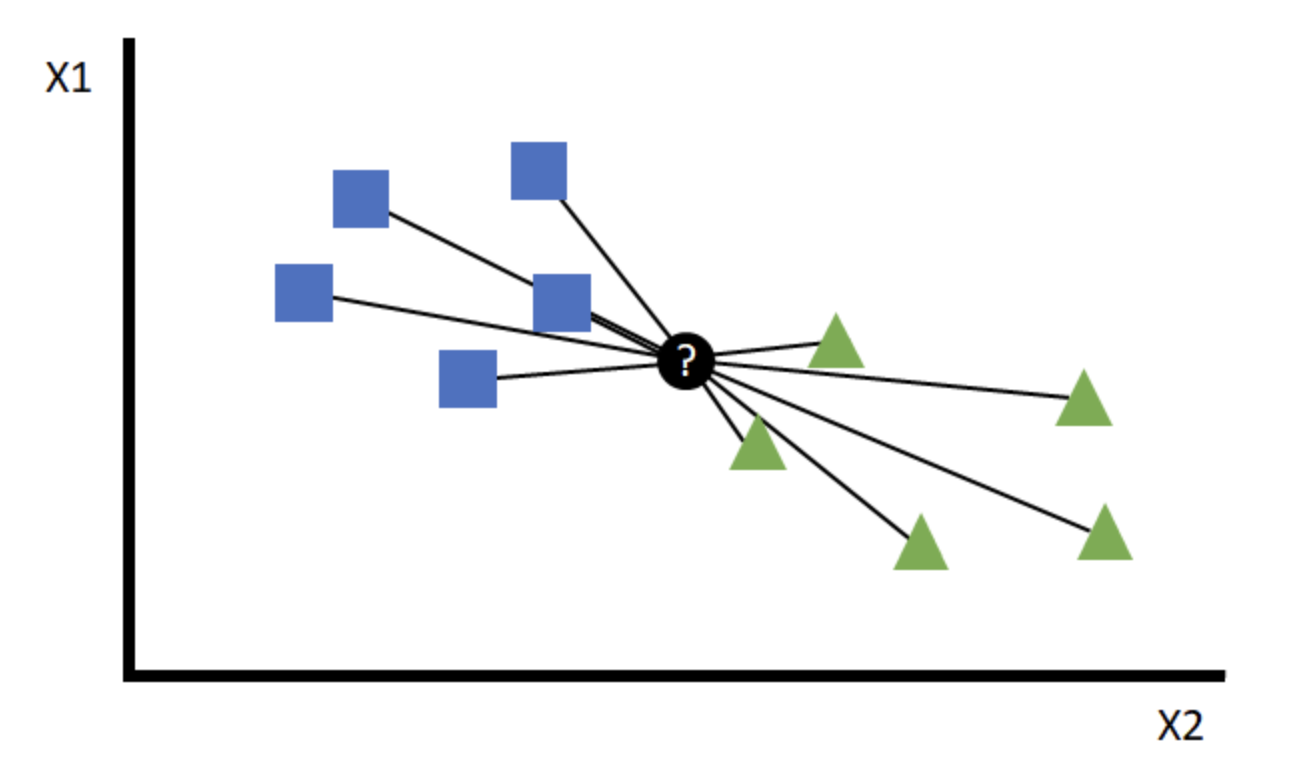

Esta distancia ordena a los puntos que rodean al punto que se quiere predecir, de tal forma que en función del valor de K se podrán elegir los más cercanos:

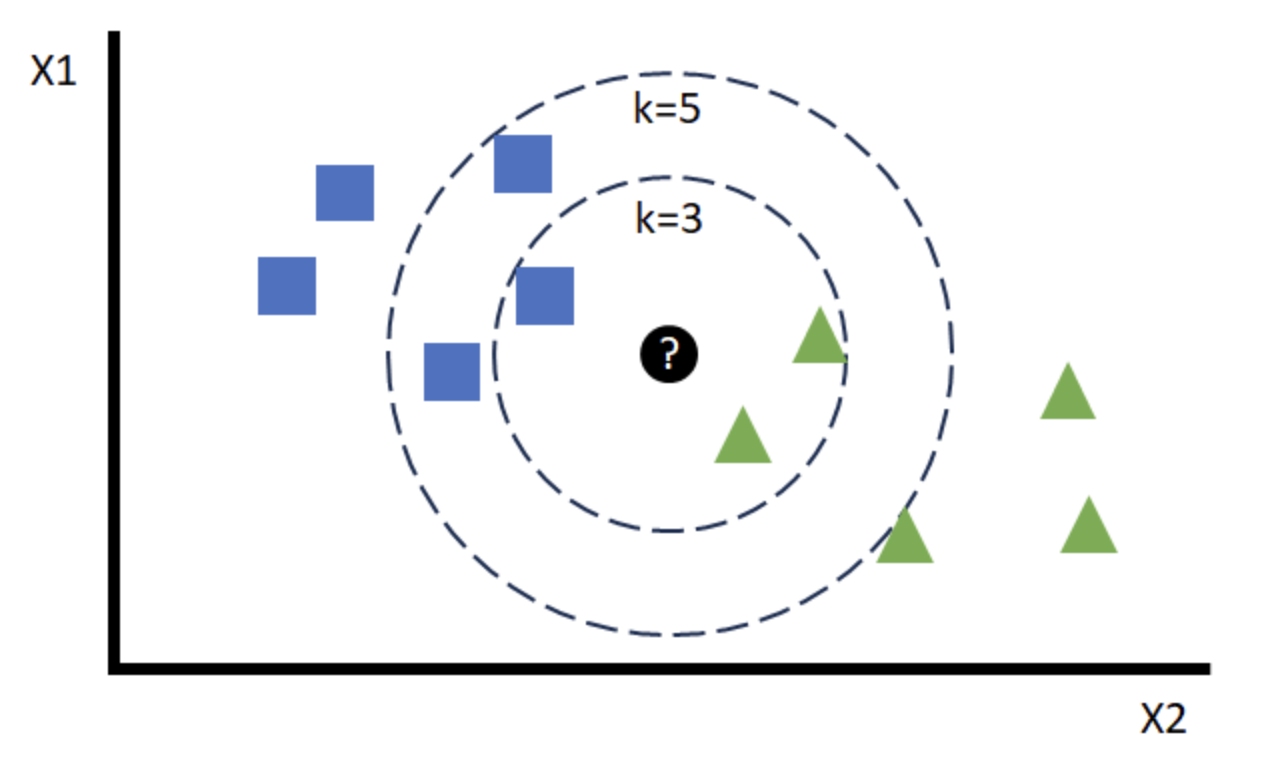

Una de las preguntas más comunes en este tipo de modelos trata sobre qué valor óptimo de K debemos elegir. Este número no se puede calcular a priori y se aproxima en la fase de optimización de hiperparámetros. Como se puede visualizar en el caso de la figura, su valor puede decantar una predicción concreta hacia la contraria u otra con ligeros cambios.

###Métrica de distancia
Las métricas de distancia son funciones utilizadas para medir la proximidad o similitud entre dos puntos de datos en un modelo KNN. Existen una gran cantidad de propuestas, pero las más conocidas son las siguientes:

- **Euclidiana (Euclidean)**: Mide la distancia en línea recta entre dos puntos. Adecuada para datos numéricos.
Ejemplo: Clasificación de clientes según sus hábitos de compra en una tienda en línea.

- **Manhattan**: Mide la distancia como la diferencia de las coordenadas cartesianas de ambos puntos. Es adecuada para datos numéricos también. Ejemplo: Predicción del precio de una propiedad según sus características (número de habitaciones, área en pies cuadrados, distancia a la ciudad, etc.).

- **Minkowski**: Es un punto intermedio entre las dos anteriores. Ejemplo: Clasificación de imágenes según características como textura, color y forma.

- **Chebyshev**: También conocida como la distancia máxima entre la diferencia de alturas (eje Y) o de anchuras (eje X). Ejemplo: Clasificación de células cancerígenas basada en características morfológicas como el tamaño y la forma del núcleo celular.

- **Coseno (Cosine)**: Utilizada para medir la similitud entre dos vectores. Ejemplo: Recomendación de productos a usuarios según sus historiales de compra.

- **Hamming**: Se utiliza para datos categóricos o binarios. Mide la diferencia entre dos cadenas de caracteres de igual longitud. Ejemplo: Clasificación de correos electrónicos como spam o no spam basado en el contenido del mensaje (usando representación binaria de palabras clave).

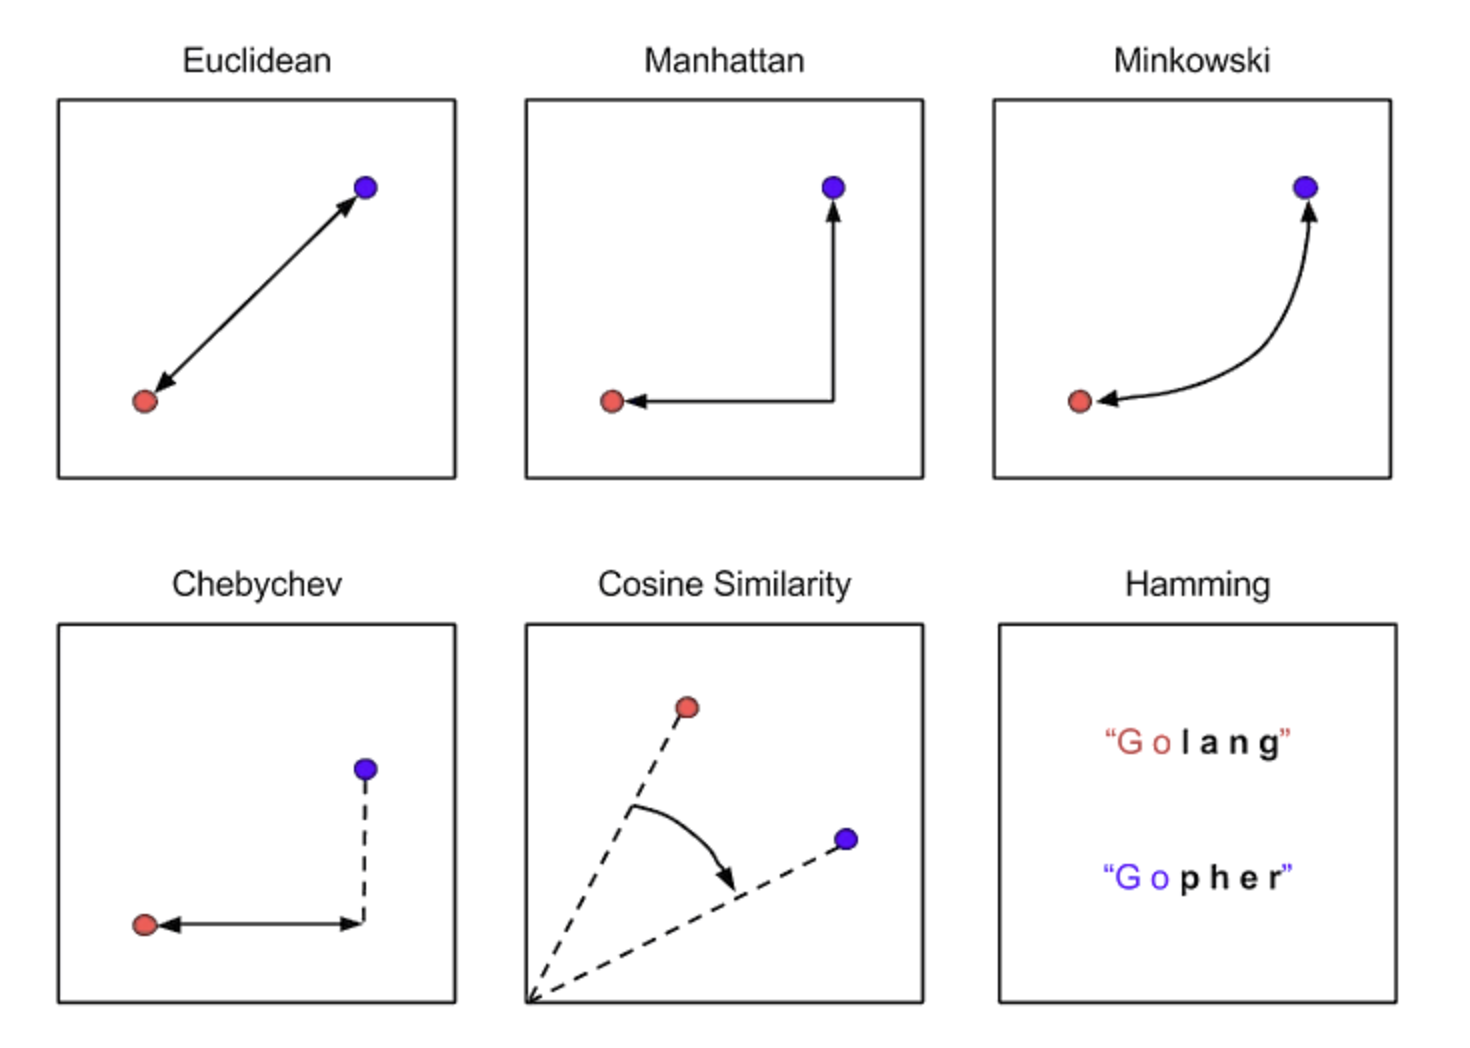

##Hiperparametrización del modelo
Podemos construir un modelo KNN fácilmente en Python utilizando la librería scikit-learn y las funciones KNeighborsClassifier y KNeighborsRegressor. Algunos de sus hiperparámetros más importantes y los primeros en los que debemos centrarnos son:

- **n_neighbors**: Es el valor K que hemos mencionado anteriormente. Representa el número de puntos de datos más cercanos que se considerarán al clasificar o predecir un nuevo punto de datos. Es el hiperparámetro más importante en KNN y afecta directamente la forma de las fronteras de decisión del modelo. Un valor pequeño puede llevar a un modelo más sensible al ruido y outliers, mientras que un valor grande puede simplificar el modelo.
- **metric**: Función para calcular la distancia entre los puntos de datos y el nuevo punto. La elección de la métrica puede afectar la forma en la que el modelo interpreta la proximidad entre puntos y, por lo tanto, la clasificación o predicción resultante.
- **algorithm**: Diferentes implementaciones del modelo KNN, que serán más o menos efectivos dependiendo de las características y complejidad del conjunto de datos.

## KNN en Python

A continuación veremos cómo podemos implementar este modelo en Python. Para ello, utilizaremos la librería `scikit-learn`.

### KNN para clasificación

Para ejemplificar la implementación de un KNN para clasificación utilizaremos el conjunto de datos que venimos utilizando en los módulos anteriores y que ha sido normalizado debido a que este tipo de modelos lo requiere.

#### Paso 1. Lectura del conjunto de datos procesado

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_iris.csv")

X = total_data.drop("specie", axis = 1)
y = total_data["specie"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,-1.506521,1.249201,-1.567576,-1.315444
15,-0.173674,3.090775,-1.283389,-1.052180
65,1.038005,0.098217,0.364896,0.264142
11,-1.264185,0.788808,-1.226552,-1.315444
42,-1.748856,0.328414,-1.397064,-1.315444


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad.

Para asegurar el correcto funcionamiento de este modelo y evitar errores, la estandarización de los datos es necesaria ya que si las características no están en la misma escala, aquellas con magnitudes más grandes pueden dominar la distancia y afectar el resultado del algoritmo.

Por ejemplo, si tenemos dos características: la edad (con valores entre 0 y 100) y el ingreso anual (con valores entre 0 y 100.000), la diferencia de escala entre ambas variables podría hacer que el ingreso anual tenga un impacto desproporcionado en la distancia ignorando la importancia de la edad.

Estandarizar los datos ayuda a que todas las características contribuyan de manera equitativa a la distancia, lo que puede mejorar el rendimiento del algoritmo KNN. La elección entre normalización y estandarización Min-Max dependerá del comportamiento de las variables y de cómo afectan al rendimiento del modelo. Si tenemos características con diferentes escalas y rango, Min-Max es la mejor alternativa. Si por el contrario tienen la misma escala o similar, la normalización es la más apropiada.

A continuación visualizaremos la relación entre las variables del dataset (hemos escogido tres para realizar un gráfico 3D, ya que no podemos coger más y graficarlas; no existen los gráficos 4D):

In [2]:
# Añadimos el nombre de la especie para el plot

total_data["specie"] = total_data["specie"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [3]:
import plotly.express as px

fig = px.scatter_3d(total_data, x = "petal width (cm)", y = "petal length (cm)", z = "sepal width (cm)", color = "specie", width = 1000, height = 500,
                    size = total_data["petal length (cm)"].abs(), color_discrete_sequence=["#E58139", "#39E581", "#8139E5"])
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

El gráfico 3D permite analizar la separación y distribución de las clases en función de la combinatoria de las 3 variables. Claramente se observa que dado un punto y las variables predictoras seríamos capaz de, aprovechando la potencia y capacidad predictora de un modelo KNN, de realizar una precisión adecuada.

Para más información, podríamos calcular un diagrama de puntos para la relación entre las variables dos a dos (esto tendría que hacerse en el EDA):

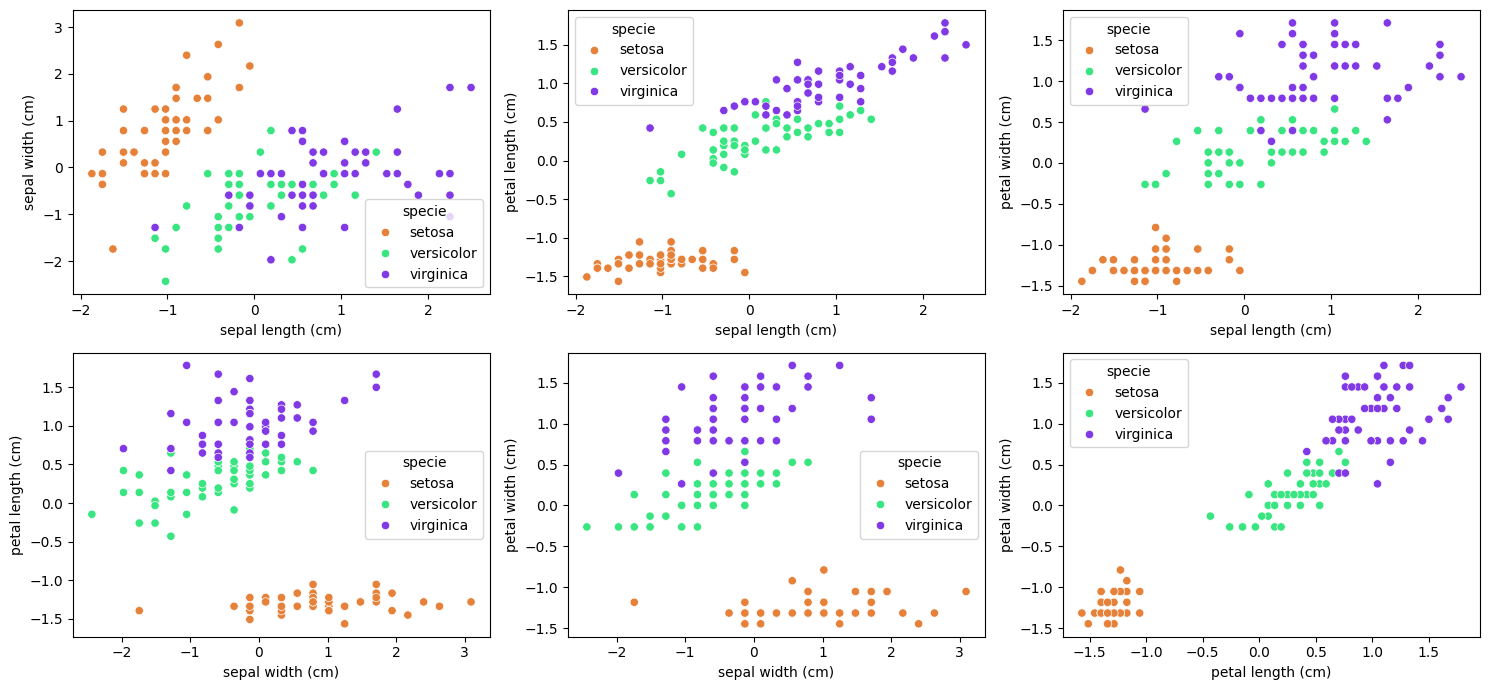

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["#E58139", "#39E581", "#8139E5"]
sns.scatterplot(ax = axis[0, 0], data = total_data, x = "sepal length (cm)", y = "sepal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = total_data, x = "sepal length (cm)", y = "petal length (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = total_data, x = "sepal length (cm)", y = "petal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = total_data, x = "sepal width (cm)", y = "petal length (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = total_data, x = "sepal width (cm)", y = "petal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = total_data, x = "petal length (cm)", y = "petal width (cm)", hue = "specie", palette = palette)

plt.tight_layout()

plt.show()

Comparando las predictoras una a una (para que sea más gráfico y explícito) se observa mejor la separación en función de los valores de las clases. Por lo tanto, el modelo KNN es también muy apropiado para resolver el problema.

#### Paso 2: Inicialización y entrenamiento del modelo

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la tipología de modelo y su configuración.

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [6]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

El modelo es perfecto!

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [8]:
from pickle import dump

dump(model, open("knn_classifier_default.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos qué configuración tiene (en este caso decimos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función).

### KNN para regresión

Para ejemplificar la implementación de un algoritmo KNN mostraremos cómo generar un conjunto de datos que satisfaga nuestras necesidades.

#### Paso 1. Lectura del conjunto de datos procesado

In [9]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 1000, n_features = 4, noise = 1, random_state = 42)
X = pd.DataFrame(X, columns = ["Var1", "Var2", "Var3", "Var4"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Var1,Var2,Var3,Var4
29,-0.518270,0.357113,1.477894,-0.219672
535,0.457687,-2.120700,-0.606865,-2.238231
695,-0.224633,0.940771,-0.982487,-0.989628
557,0.360648,-0.320298,1.643378,-2.077812
836,-0.307962,-0.144519,-0.792420,-0.675178


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

En la regresión también es necesario estandarizar los datos. En este caso, ya nos vienen estandarizados. Tal y como hemos hecho anteriormente, dibujaremos de nuevo el gráfico 3D y las relaciones una a una de las características del dataset generado artificialmente:

In [10]:
import plotly.express as px

total_data = X.copy()
total_data["target"] = y

fig = px.scatter_3d(total_data, x = "Var1", y = "Var2", z = "Var3", color = "target", width = 1000, height = 500,
                    size = total_data["Var4"].abs())
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

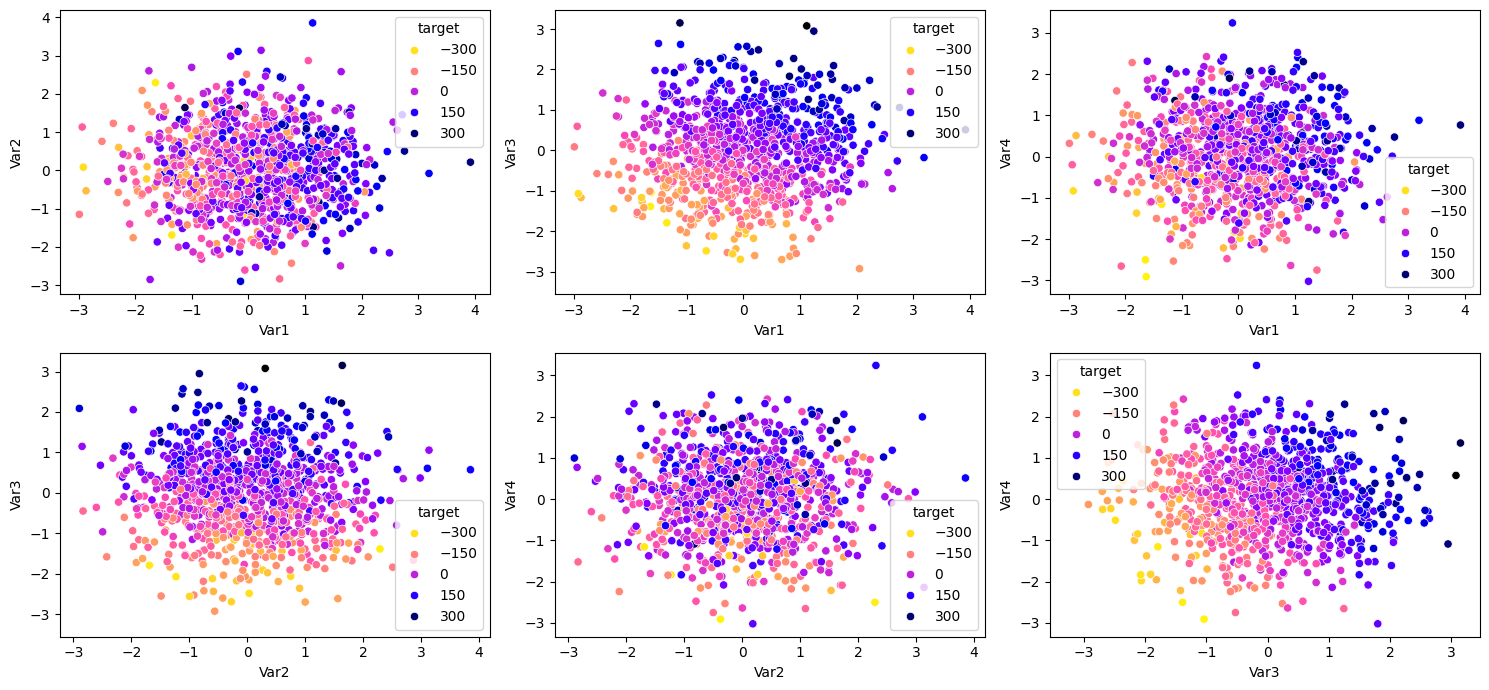

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = sns.color_palette("gnuplot2_r", as_cmap=True)
sns.scatterplot(ax = axis[0, 0], data = total_data, x = "Var1", y = "Var2", hue = "target", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = total_data, x = "Var1", y = "Var3", hue = "target", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = total_data, x = "Var1", y = "Var4", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = total_data, x = "Var2", y = "Var3", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = total_data, x = "Var2", y = "Var4", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = total_data, x = "Var3", y = "Var4", hue = "target", palette = palette)

plt.tight_layout()

plt.show()

Vemos que para la mayoría de variables se establece cierto patrón diferenciador y que la regresión puede arrojar buenos resultados.

#### Paso 2: Inicialización y entrenamiento del modelo

In [12]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [13]:
y_pred = model.predict(X_test)
y_pred

array([-147.41721871,   12.7128117 ,  -36.12302539,  -21.93648933,
       -144.32582093,   -4.62694737,   25.33274569,  -32.72285068,
         58.56266885,  155.66838297,  -91.57904794, -209.25552065,
       -125.0049947 ,  -40.94453209,   77.06000418,   -2.31024234,
         89.23243529,  -87.10430605,  -12.75608929, -107.40101528,
         59.5285574 ,  -73.2172528 ,   12.89565   , -152.20708656,
         68.31889013, -150.10454511,  -34.63535979,  -46.82258216,
        137.590877  ,   84.72199868, -115.13576847,  -23.02387497,
         99.53383414,  221.35135356,   26.10949006,  -78.30179293,
       -153.46745873,  155.37084184,   97.19477898,  156.55504796,
         33.52863468,  -53.06285465,   -2.71200404,  138.92351044,
        -28.8475082 ,  -54.68111873,    0.39307033,   14.64850846,
        -18.68501556,   82.45571704,  171.35059264,  -39.28831728,
         50.92959341, -140.09104896,   55.2744179 ,  -45.23494761,
        -55.32923476,   40.641162  ,   13.65687921,   79.13259

Para calcular la efectividad del modelo utilizaremos el **error cuadrático medio** (*MSE*):

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 564.8367646867368
Coefficient of determination: 0.9547914514799766


El modelo está muy cerca de ser perfecto.

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [15]:
dump(model, open("knn_regressor_default.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos qué configuración tiene (en este caso decimos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función).